# Project 3: Uganda (fancier title?)

#### Team Jevons: Saraya Danielsen, Anoushka Gupta, Adrianna Ngo, Renee Lin, Yinan Xia, Aidan Gauper

*Describe project goals and main ideas here*

In [12]:
!pip install CFEDemands --upgrade
!pip install ConsumerDemands
!pip install oauth2client
!pip install eep153_tools
!pip install gnupg
#!pip install dvc

Requirement already up-to-date: CFEDemands in /opt/conda/lib/python3.9/site-packages (0.4.1)


In [13]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

# [A]: Choice of Population, with supporting Expenditure Data

* Uganda
* Focusing on Female 14-30 demographic

#### Reading in Google Sheets:

In [14]:
InputFiles = {'Expenditures':('1mZcHvSD55wGCicdqxbEnioE3AOXM_pVb6zVwHhtBzSk','Expenditures'),
              'Consumption':('1RT5AfbZbWx-CmNaOHLp7aD9qEjgjiBv8lZmPexuKEWg','Consumption'),
              'HH Characteristics':('1mZcHvSD55wGCicdqxbEnioE3AOXM_pVb6zVwHhtBzSk','HH Characteristics')}
              
    #,'FCT':('1TM7FpKURXFAuXW4dLpGt98QA2CH4WTDty-4nPOUv1Mg','05 NV_sum_57 (per 100g EP)')}

#### Function for reading in sheets:

In [15]:
def get_clean_sheet(key,sheet=None):
    dfs = read_sheets(key)
    if sheet is not None:
        df = dfs[sheet]
    else:
        df = dfs.values()[0] 
    df.columns = [c.strip() for c in df.columns.tolist()]
    df = df.loc[:,~df.columns.duplicated(keep='first')]   
    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)
    df = df.loc[~df.index.duplicated(), :]
    return df

## Expenditures Table

In [16]:
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

Key available for students@eep153.iam.gserviceaccount.com.


,,i,Matooke(cluster),Matooke(others),avocado,beans dry,beans fresh,beef,beer,bread,cabbages,carrots,...,simsim,soda,sorghum,sugar,sweet bananas,sweet potatoes dry,sweet potatoes fresh,tea,tomatoes,watermelon
j,t,m,,,,,,,,,,,,,,,,,,,,,
1013000201,2005,1,NaN,NaN,NaN,NaN,NaN,6000.0,2400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4500.0,NaN,NaN,NaN,50.0,700.0,NaN
1013000202,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000204,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000206,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000209,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,25600.0,NaN,NaN,NaN,...,NaN,5000.0,NaN,2000.0,NaN,NaN,5000.0,100.0,200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010730012030203,2011,1,NaN,NaN,NaN,NaN,8000.0,7500.0,NaN,14000.0,NaN,NaN,...,NaN,2000.0,NaN,1700.0,NaN,NaN,1000.0,300.0,1400.0,NaN
3010730016100203,2011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,NaN,400.0,...,NaN,NaN,NaN,900.0,NaN,NaN,NaN,100.0,1000.0,NaN
3010830020020503,2011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,800.0,NaN,...,NaN,NaN,NaN,2400.0,NaN,NaN,NaN,300.0,500.0,NaN


#### Taking log of expenditure table (x); log table (y) will be used for later estimation:

In [17]:
y = np.log(x)

## Household Characteristics Table

In [18]:
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

Key available for students@eep153.iam.gserviceaccount.com.


,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
j,t,m,,,,,,,,,,,,,,
1013000201,2005,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1013000202,2005,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1013000204,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1013000206,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1013000209,2005,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010730012030203,2011,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3010730016100203,2011,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3010830020020503,2011,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0


## Consumption Quantities Table

In [19]:
q = get_clean_sheet(InputFiles['Consumption'][0],
                    sheet=InputFiles['Consumption'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

q

Key available for students@eep153.iam.gserviceaccount.com.


i                                            Matooke(cluster)  \
j            t    m u                                           
1.013000e+09 2005 1 Bottle (300 ml)                       NaN   
                    Bottle (500 ml)                       NaN   
                    Fish - Whole (1   2 kg)               NaN   
                    Kilogram (kg)                         NaN   
                    Litre                                 NaN   
...                                                       ...   
3.020000e+16 2011 1 Kilogram (kg)                         NaN   
                    Litre                                 NaN   
                    Packet (100 g)                        NaN   
                    Piece-Big                             NaN   
                    Piece-Small                           NaN   

i                                            Matooke(others)  avocado  \
j            t    m u                                                   
1.013000e+09 2005 1 Bottle (300 ml)                      NaN      NaN   
                    Bottle (500 ml)                      NaN      NaN   
                    Fish - Whole (1   2 kg)              NaN      NaN   
                    Kilogram (kg)                        NaN      NaN   
                    Litre                                NaN      NaN   
...                                                      ...      ...   
3.020000e+16 2011 1 Kilogram (kg)                        NaN      NaN   
                    Litre                                NaN      NaN   
                    Packet (100 g)                       NaN      NaN   
                    Piece-Big                            NaN      NaN   
                    Piece-Small                          NaN      NaN   

i                                            beans dry  beans fresh  beef  \
j            t    m u                                                       
1.013000e+09 2005 1 Bottle (300 ml)                NaN          NaN   NaN   
                    Bottle (500 ml)                NaN          NaN   NaN   
                    Fish - Whole (1   2 kg)        NaN          NaN   NaN   
                    Kilogram (kg)                  NaN          NaN   2.0   
                    Litre                          NaN          NaN   NaN   
...                                                ...          ...   ...   
3.020000e+16 2011 1 Kilogram (kg)                  NaN          NaN   NaN   
                    Litre                          NaN          NaN   NaN   
                    Packet (100 g)                 NaN          NaN   NaN   
                    Piece-Big                      NaN          NaN   NaN   
                    Piece-Small                    NaN          NaN   NaN   

i                                            beer  bread  cabbages  carrots  \
j            t    m u                                                         
1.013000e+09 2005 1 Bottle (300 ml)           NaN    NaN       NaN      NaN   
                    Bottle (500 ml)           2.0    NaN       NaN      NaN   
                    Fish - Whole (1   2 kg)   NaN    NaN       NaN      NaN   
                    Kilogram (kg)             NaN    NaN       NaN      NaN   
                    Litre                     NaN    NaN       NaN      NaN   
...                                           ...    ...       ...      ...   
3.020000e+16 2011 1 Kilogram (kg)             NaN    NaN       NaN      NaN   
                    Litre                     NaN    NaN       NaN      NaN   
                    Packet (100 g)            NaN    NaN       NaN      NaN   
                    Piece-Big                 NaN    NaN       NaN      NaN   
                    Piece-Small               NaN    NaN       NaN      NaN   

i                                            ...  simsim  soda  sorghum  \
j            t    m u                        ...                          
1.013000e+09 2005 1 Bott

# [B]: Nutritional content of foods

## Food Conversion Table

* Anoushka add in here

In [20]:
#fct = get_clean_sheet(InputFiles['FCT'][0],
                    # sheet=InputFiles['FCT'][1])

#### This bit peculiar to Niger FCT #####
# fct = fct.loc[fct.Code.str.len()==6]
# fct = fct.set_index('Code')
# fct.columns = [v.replace('\n',' ') for v in fct.columns]
########################################

# fct.index.name = 'i'

# fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# fct

# [B]: Estimate Demand System

### Our Population
Filtering to get households with women in our demographic: 15-30 (so we'll use the age brackets "F 14-18" and "F 19-30")

#### (Saraya's note: lol this entire area is a mess as I stumbled towards finding what I wanted to find, once it's all set I will make it better)

In [21]:
# Make a column for filtering; it'll be 0 if there's no Female 14-30 year olds, 
# and 1 or greater if there are (it's just a total of this demographic per household)

young_female = z
young_female['F 14-30?'] = z["F 14-18"] + z["F 19-30"]

In [22]:
filter1 = young_female["F 14-30?"]!=0

In [23]:
# Here are households that have at least 1 person F 14-30:

young_homes = young_female[filter1]

### Filtering further to find households that are LIKELY* family households with young mothers under 30
* Uganda average female age at first marriage: 18.2 years ([source](http://www.quandl.com/demography/age-at-first-marriage-female-all-countries))
* Mother's mean age at first birth: 19.4 years ([source](https://www.cia.gov/the-world-factbook/))

#### *Key word likely; if anything, 'young_mothers' can be our roughly accurate sample that probably captures a lot of young-mother homes, even if some non-young-mother homes might slip through the cracks, it's still a better sample of our population than if we just used the original dataframe of all households

In [26]:
# Filtering the homes with young women further, to find ones with probable young mothers

# Do this by looking for the ones with children in the 0-8 range
# Maybe households that don't have an older adult in the house? But what if their parents live with them?
# Okay this might not be a perfect; ask team which filters to keep

# Team Decision: keep the child filter, get rid of the older adult filter (grandparents might live with them)



# Add more filtering columns (combining Male & Female for counts)
age_counts = young_homes
age_counts['Child 0-8?'] = young_homes['M 0-3'] + young_homes['F 0-3'] + young_homes['M 4-8'] + young_homes['F 4-8']

# Scrapped code for older adult filter:
# age_counts['Adult 51+?'] = young_homes["F 51+"] + young_homes["M 51+"]


/tmp/ipykernel_24/414126771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_counts['Child 0-8?'] = young_homes['M 0-3'] + young_homes['F 0-3'] + young_homes['M 4-8'] + young_homes['F 4-8']


In [28]:
# Children filter:
filter2 = age_counts["Child 0-8?"]>=1

# Scrapped older adult filter:
# filter3 = children_count["Adult 51+?"]==0

In [29]:
# Use filter (can add more here if needed, using '&')

young_mothers = age_counts[filter2]

In [31]:
# We don't need the filtering columns anymore, drop them:

young_mothers = young_mothers.drop(['F 14-30?', 'Child 0-8?'], axis=1)

## Estimation 1: Demand

In [34]:
# Get the unaltered original national population dataframe back, so it can be used for comparison.

original_df = z.drop('F 14-30?', axis=1)

In [35]:
# Create reduced form
import cfe


# Change what we use for z (appropriate households for our population) here depending on what group thinks is best;
# If my estimation for young mothers ('young_mothers') doesn't seem accurate, 
# just use the broader 'young_homes' dataframe

# If anything, 'young_mothers' can be a roughly accurate sample that probably captures a lot of young mother homes,
# even if some non-young-mother homes might slip through the cracks, it's still a better sample of our population
# than if we just used the original dataframe of all houses


# Create reduced form for population AND original population, to see how rates of demand differ
result_young_mom = cfe.Result(y=y,z=young_mothers)

result_national_avg = cfe.Result(y=y,z=original_df)

Missing dependencies for OracleDemands.


In [36]:
result_young_mom

<xarray.Result>
Dimensions:           (k: 14, j: 3294, t: 4, m: 1, i: 37)
Coordinates:
  * j                 (j) int64 1013000201 1013000202 ... 30211230006050302
  * t                 (t) int64 2005 2009 2010 2011
  * m                 (m) int64 1
  * i                 (i) <U34 'beans dry' 'beans fresh' ... 'tea' 'tomatoes'
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 nan 0.0 0.0 0.0 ... nan nan nan 1.0
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 nan 0.0 0.0 0.0 ... nan nan nan 1.0
Attributes:
    firstround:            2005
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [37]:
result_national_avg

<xarray.Result>
Dimensions:           (k: 14, j: 3737, t: 4, m: 1, i: 37)
Coordinates:
  * j                 (j) int64 1013000201 1013000202 ... 30211230006050302
  * t                 (t) int64 2005 2009 2010 2011
  * m                 (m) int64 1
  * i                 (i) <U34 'beans dry' 'beans fresh' ... 'tea' 'tomatoes'
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.0
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.0
Attributes:
    firstround:            2005
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [38]:
# run this to be able to run the next few lines:

result_young_mom.get_reduced_form()
result_national_avg.get_reduced_form()

### Coefficients for each age/sex bracket and food item:

Example understanding for the first entry (M 0-3 and 'beans dry'): 
* Holding household size constant, for every boy under the age of 3, there is a 1.5% increase in household expenditures on dry beans (on average)


#### (Coefficients for our targeted population:)

In [39]:
result_young_mom.delta.to_dataframe().unstack('k')

delta                                \
k                                      M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                            
beans dry                          -0.008050  0.109554  0.099555  0.086806   
beans fresh                         0.053203  0.085582  0.040471  0.106387   
beef                                0.017155  0.046932  0.079639  0.077272   
bread                              -0.014561  0.006950  0.030625  0.038534   
cabbages                            0.007793 -0.000755  0.046500  0.066996   
cassava dry/flour                   0.225193  0.127425  0.232921  0.033564   
cassava fresh                       0.010303  0.065166  0.138345  0.063965   
chicken                            -0.009587 -0.080533 -0.025480  0.058228   
coffee                              0.029685  0.005917  0.012665 -0.047136   
cooking oil                        -0.063113 -0.008775  0.016737  0.038470   
dodo                               -0.070677 -0.079350  0.158714  0.127543   
dry/smoked fish                    -0.054833  0.067334  0.107231  0.121924   
eggs                               -0.083052  0.087467 -0.031012 -0.139997   
expenditure in restaurants on food -0.058876  0.064692  0.168754 -0.012606   
fresh fish                          0.032255  0.098002  0.039983  0.079086   
fresh milk                          0.003193 -0.006533 -0.028649 -0.042681   
goat meat                          -0.032379  0.143711  0.039786  0.084602   
ground nuts pounded                 0.019792  0.011660  0.026364  0.037667   
irish potatoes                      0.150822  0.080003  0.068237  0.089914   
maize cobs                         -0.153546 -0.014881  0.011263  0.061175   
maize flour                         0.025809  0.126400  0.160851  0.095886   
mangoes                             0.063847 -0.031852  0.055477 -0.110957   
margarine,butter                   -0.059913 -0.070962 -0.146940 -0.014312   
matooke_1                          -0.045816  0.133845 -0.005364  0.004133   
millet                              0.032848  0.097207 -0.004055  0.134663   
onions                             -0.073071 -0.046107  0.052536  0.027830   
oranges                            -0.025743  0.113541  0.101476  0.058566   
other vegetables                    0.031520 -0.060657  0.136705  0.097724   
passion fruits                     -0.016344 -0.072767  0.014995 -0.112859   
rice                                0.081947  0.120467  0.097217  0.098413   
salt                                0.056815  0.055748  0.069163  0.071801   
soda                               -0.003991 -0.066366  0.003212 -0.042420   
sugar                               0.008970  0.066192  0.035367  0.065254   
sweet bananas                       0.017520  0.024528 -0.003816 -0.063612   
sweet potatoes fresh                0.106827  0.151512  0.163749  0.109162   
tea                                -0.007589 -0.005940  0.021608  0.025997   
tomatoes                           -0.042494 -0.028694  0.030120  0.047232   

                                                                            \
k                                    M 19-30   M 31-50     M 51+     F 0-3   
i                                                                            
beans dry                           0.073123  0.124480  0.165979  0.044241   
beans fresh                         0.107695  0.310090  0.432135  0.064156   
beef                                0.115042  0.185275  0.179557 -0.000282   
bread                               0.116037  0.298536  0.077156  0.035659   
cabbages                            0.046259  0.057316  0.028164  0.022615   
cassava dry/flour                   0.029249  0.110399  0.209043  0.012545   
cassava fresh                       0.060914  0.095322 -0.035566  0.031349   
chicken                             0.129972  0.129186  0.098517 -0.028109   
coffee                              0.082692  0.177492  0.23

#### (Coefficients for total national population:)

In [40]:
result_national_avg.delta.to_dataframe().unstack('k')

delta                                \
k                                      M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                            
beans dry                          -0.020105  0.091101  0.069991  0.131634   
beans fresh                         0.003502  0.138232  0.049423  0.043303   
beef                                0.012622  0.025357  0.076339  0.081080   
bread                              -0.010931 -0.010405  0.039982  0.015581   
cabbages                            0.014337 -0.007694  0.035684  0.098675   
cassava dry/flour                   0.240597  0.163090  0.237445  0.090692   
cassava fresh                      -0.003535  0.006866  0.158522  0.094510   
chicken                             0.005440 -0.043764  0.015580  0.035094   
coffee                              0.022706 -0.057133  0.028877  0.008619   
cooking oil                        -0.029436 -0.006941  0.021453  0.052854   
dodo                               -0.064294  0.010363  0.145474  0.102694   
dry/smoked fish                    -0.037726  0.043358  0.094554  0.125807   
eggs                               -0.071013  0.041225  0.006218  0.000555   
expenditure in restaurants on food -0.094559  0.037472  0.151278  0.025689   
fresh fish                          0.020568  0.080817  0.028284  0.073189   
fresh milk                         -0.001583 -0.002583 -0.014292 -0.023467   
goat meat                          -0.052198  0.101357  0.009729  0.055356   
ground nuts pounded                 0.033751  0.022292  0.009320  0.044031   
irish potatoes                      0.086792  0.069802  0.115015  0.128570   
maize cobs                         -0.064494 -0.044831  0.043807  0.182292   
maize flour                         0.009996  0.112082  0.142091  0.075552   
mangoes                            -0.012302  0.032207  0.053649 -0.052200   
margarine,butter                   -0.015707  0.022894 -0.081790 -0.020390   
matooke_1                          -0.017372  0.179616  0.051870  0.053682   
millet                              0.096938  0.067989  0.001464  0.142472   
onions                             -0.051036 -0.027855  0.030258  0.048141   
oranges                            -0.050278  0.097141  0.035387  0.028289   
other vegetables                    0.012330 -0.046587  0.078986  0.052800   
passion fruits                      0.007164 -0.067459  0.028914 -0.094513   
rice                                0.041959  0.089870  0.105172  0.099908   
salt                                0.072773  0.065634  0.082439  0.087910   
soda                               -0.011965 -0.063974  0.055411 -0.049988   
sugar                               0.012851  0.059009  0.045291  0.091241   
sweet bananas                       0.011865  0.005062  0.000327  0.025421   
sweet potatoes fresh                0.110313  0.127481  0.137242  0.100394   
tea                                -0.012445  0.016257  0.036033  0.041242   
tomatoes                           -0.040840 -0.022914  0.018166  0.050890   

                                                                            \
k                                    M 19-30   M 31-50     M 51+     F 0-3   
i                                                                            
beans dry                           0.092998  0.126748  0.192872  0.035235   
beans fresh                         0.140382  0.256491  0.353082  0.098333   
beef                                0.114490  0.197677  0.197012  0.004936   
bread                               0.133572  0.290906  0.142049  0.021215   
cabbages                            0.061728  0.060672  0.079951  0.038930   
cassava dry/flour                   0.106282  0.175328  0.190029  0.068200   
cassava fresh                       0.057267  0.043634  0.019687  0.003492   
chicken                             0.125162  0.132872  0.148593 -0.003726   
coffee                              0.098526  0.060754  0.42

#### AN INTERESTING COMPARISON TO MAKE: see if values are different between smaller 'young mom household' population vs. the national average

* So there are certainly differences; I don't know where to start. Any insights from anyone?

### Demand of each good by year:

* The bigger the number, the bigger the demand for that good, in that year
* Captures the effects of prices

In [41]:
result_young_mom.a.to_dataframe().unstack('i')

a                                                              \
i      beans dry beans fresh      beef     bread  cabbages cassava dry/flour   
t    m                                                                         
2005 1  6.635914    6.153717  7.629456  6.563065  6.070295          7.268818   
2009 1  7.153452    6.585853  8.132392  7.224915  6.344837          7.678732   
2010 1  7.321221    6.838415  8.140938  7.126186  6.419194          7.665604   
2011 1  7.424456    7.098401  8.424622  7.457943  6.649074          7.991567   

                                                      ...                   \
i      cassava fresh   chicken    coffee cooking oil  ... other vegetables   
t    m                                                ...                    
2005 1      6.452497  8.317578  4.254601    6.261803  ...         5.591272   
2009 1      6.940748  8.808298  4.582972    6.689436  ...         6.137598   
2010 1      6.863434  9.081406  4.565842    6.806763  ...         6.030381   
2011 1      7.369304  9.339155  4.877937    6.996323  ...         6.389070   

                                                                             \
i      passion fruits      rice      salt      soda     sugar sweet bananas   
t    m                                                                        
2005 1       6.515018  6.881834  4.440534  7.178438  6.935185      6.014295   
2009 1       6.806441  7.404766  5.076375  7.469777  7.288539      6.464872   
2010 1       6.746264  7.453217  5.013390  7.660819  7.464642      6.457114   
2011 1       6.962077  7.776008  5.170999  7.927953  7.534995      6.803200   

                                                 
i      sweet potatoes fresh       tea  tomatoes  
t    m                                           
2005 1             6.685546  4.650528  5.984946  
2009 1             7.174261  4.697096  6.454621  
2010 1             7.332355  4.697126  6.459802  
2011 1             7.369497  4.977148  6.674675  

[4 rows x 37 columns]

In [42]:
result_national_avg.a.to_dataframe().unstack('i')

a                                                              \
i      beans dry beans fresh      beef     bread  cabbages cassava dry/flour   
t    m                                                                         
2005 1  6.664045    6.166651  7.596403  6.531700  5.987894          7.000972   
2009 1  7.177776    6.660552  8.087632  7.200124  6.284722          7.403977   
2010 1  7.361983    6.874905  8.165703  7.073217  6.369316          7.427036   
2011 1  7.436129    7.184067  8.397829  7.388194  6.608653          7.770406   

                                                      ...                   \
i      cassava fresh   chicken    coffee cooking oil  ... other vegetables   
t    m                                                ...                    
2005 1      6.561716  8.220995  4.586281    6.181261  ...         5.622420   
2009 1      6.985613  8.733654  4.799347    6.605940  ...         6.134787   
2010 1      6.993906  8.798743  4.734974    6.763708  ...         6.100634   
2011 1      7.339227  9.207515  5.074747    6.940089  ...         6.475021   

                                                                             \
i      passion fruits      rice      salt      soda     sugar sweet bananas   
t    m                                                                        
2005 1       6.412390  6.868322  4.370730  7.055358  6.854877      5.973993   
2009 1       6.691317  7.375543  5.028736  7.325378  7.196572      6.407480   
2010 1       6.631896  7.440398  4.963925  7.503323  7.370396      6.422730   
2011 1       6.896860  7.743197  5.120522  7.765180  7.461896      6.816289   

                                                 
i      sweet potatoes fresh       tea  tomatoes  
t    m                                           
2005 1             6.627925  4.610117  5.958305  
2009 1             7.068341  4.678707  6.417172  
2010 1             7.447756  4.683057  6.427528  
2011 1             7.318681  4.936173  6.622662  

[4 rows x 37 columns]

Anything to note?
* Increase in demand for most things as years increase; can this have to do do with just regular... population growth? More people = more demand?
* Not reflected in young mother households, but in the national population average there is a fluctuation in: coffee, passion fruit, salt... maybe things that aren't necessary get hit when there's less to spend. Did anything happen in 2010? (A: there were riots and fighting as the government tried to stop an insurgency--would this have affected people nationwide?)

## Estimation 2: Income Elasticity (beta values)

In [43]:
result_young_mom.get_beta(as_df=True)

i
beans dry                             0.253543
beans fresh                           0.362760
beef                                  0.376069
bread                                 0.644878
cabbages                              0.332836
cassava dry/flour                     0.055199
cassava fresh                         0.257303
chicken                                    NaN
coffee                                0.681163
cooking oil                           0.455907
dodo                                  0.395295
dry/smoked fish                       0.380684
eggs                                  0.428827
expenditure in restaurants on food    0.446237
fresh fish                            0.373452
fresh milk                            0.602629
goat meat                                  NaN
ground nuts pounded                   0.365495
irish potatoes                        0.357067
maize cobs                                 NaN
maize flour                           0.228814
mangoes    

In [44]:
result_national_avg.get_beta(as_df=True)

i
beans dry                             0.255622
beans fresh                           0.381523
beef                                  0.384351
bread                                 0.568417
cabbages                              0.357247
cassava dry/flour                     0.124855
cassava fresh                         0.313435
chicken                               0.322282
coffee                                0.632619
cooking oil                           0.483203
dodo                                  0.452957
dry/smoked fish                       0.351626
eggs                                  0.420556
expenditure in restaurants on food    0.460684
fresh fish                            0.412433
fresh milk                            0.567437
goat meat                             0.360544
ground nuts pounded                   0.367467
irish potatoes                        0.388275
maize cobs                            0.356432
maize flour                           0.285216
mangoes    

#### Elasticity
* The higher the beta value^, the greater the income elasticity of the good
* Elasticity: as households grow wealthier, they shift more of their income towards high beta-value items, and less towards low beta-value items
* Poorer households will consume MORE of the LOW value items, and vice versa for wealthier households

Coding note:
* Goods that don't have enough observations are automatically dropped
* This cut-off for "not enough observations" can be controlled using the min_proportion_items and min_xproducts attributes when creating the result object.

### Alpha values

In [45]:
result_young_mom.get_alpha(as_df=True)

i
beans dry                             6.635914
beans fresh                           6.153717
beef                                  7.629456
bread                                 6.563065
cabbages                              6.070295
cassava dry/flour                     7.268818
cassava fresh                         6.452497
chicken                               8.317578
coffee                                4.254601
cooking oil                           6.261803
dodo                                  5.652908
dry/smoked fish                       6.562543
eggs                                  6.313771
expenditure in restaurants on food    7.981319
fresh fish                            7.050909
fresh milk                            7.043690
goat meat                             7.389669
ground nuts pounded                   6.303351
irish potatoes                        6.792241
maize cobs                            6.272092
maize flour                           6.714075
mangoes    

In [46]:
result_national_avg.get_alpha(as_df=True)

i
beans dry                             6.664045
beans fresh                           6.166651
beef                                  7.596403
bread                                 6.531700
cabbages                              5.987894
cassava dry/flour                     7.000972
cassava fresh                         6.561716
chicken                               8.220995
coffee                                4.586281
cooking oil                           6.181261
dodo                                  5.544825
dry/smoked fish                       6.631332
eggs                                  6.238671
expenditure in restaurants on food    7.874761
fresh fish                            7.076956
fresh milk                            7.007019
goat meat                             7.402044
ground nuts pounded                   6.263604
irish potatoes                        6.686252
maize cobs                            6.026852
maize flour                           6.736053
mangoes    

#### From notes, for context:

* "these [alpha and beta values] are the preference parameters that you can plug in when you construct a utility function"
* "you can construct demand schedules based on knowing the alpha and beta parameters"
* Consult Consumer Food Demand lecture for more!!!

## ESTIMATION IS DONE, NOW: How well does our estimated model predict the values of log expenditures in the data?

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


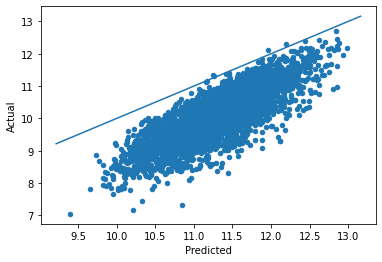

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result_young_mom.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result_young_mom.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

* Lol almost none of the dots are on the line
* Not a great predictor
* Bias for the predicted value to be less than the actual value
* But I mean... it gets the general increasing trend???

# [B] Nutritional Adequacy of Diet

* Requires FCT data to complete

Deliverable instructions: 
* Given the food actually consumed in your data, what can you say about the adequacy of the diets in the population you’re studying?
* What proportion of households consume enough so that members will exceed dietary recommendations? What proportion do not?

# [B] Engel's Law

* DOES the share of food in a household's budget fall within the overall size of the budget?
* Go over Consumer Food Demand lecture for help